<a href="https://colab.research.google.com/github/neerajac19/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading file path
df=pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction-Neeraja C/Copy of SeoulBikeData.csv',encoding='latin')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike_data=df.copy()

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
column_datatypes= bike_data.drop("Rented Bike Count",axis=1).dtypes
categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
continous_columns=list(column_datatypes[(column_datatypes=="int64") | (column_datatypes=="float64") ].index.values)

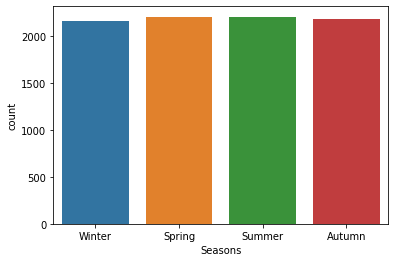

In [8]:
sns.countplot(bike_data['Seasons'])

In [9]:
season_bike_count=bike_data.groupby('Seasons')['Rented Bike Count'].sum().reset_index().sort_values('Rented Bike Count',ascending=False)

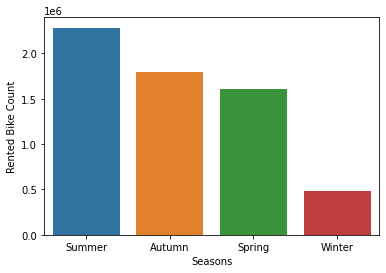

In [10]:
plt.figure(figsize = (6,4))
sns.barplot(x = season_bike_count['Seasons'], y = season_bike_count['Rented Bike Count'] )
plt.show()

There are high rental demand in summer.

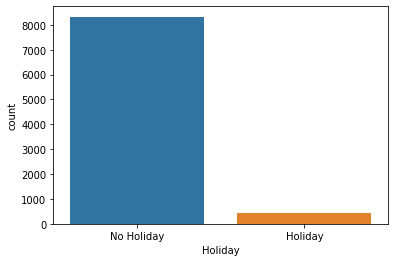

In [11]:
sns.countplot(bike_data['Holiday'])

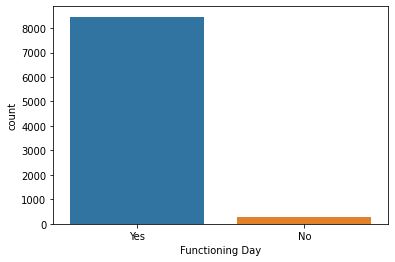

In [12]:
sns.countplot(bike_data['Functioning Day'])

 Rental count in workingday is much more than that in holiday.

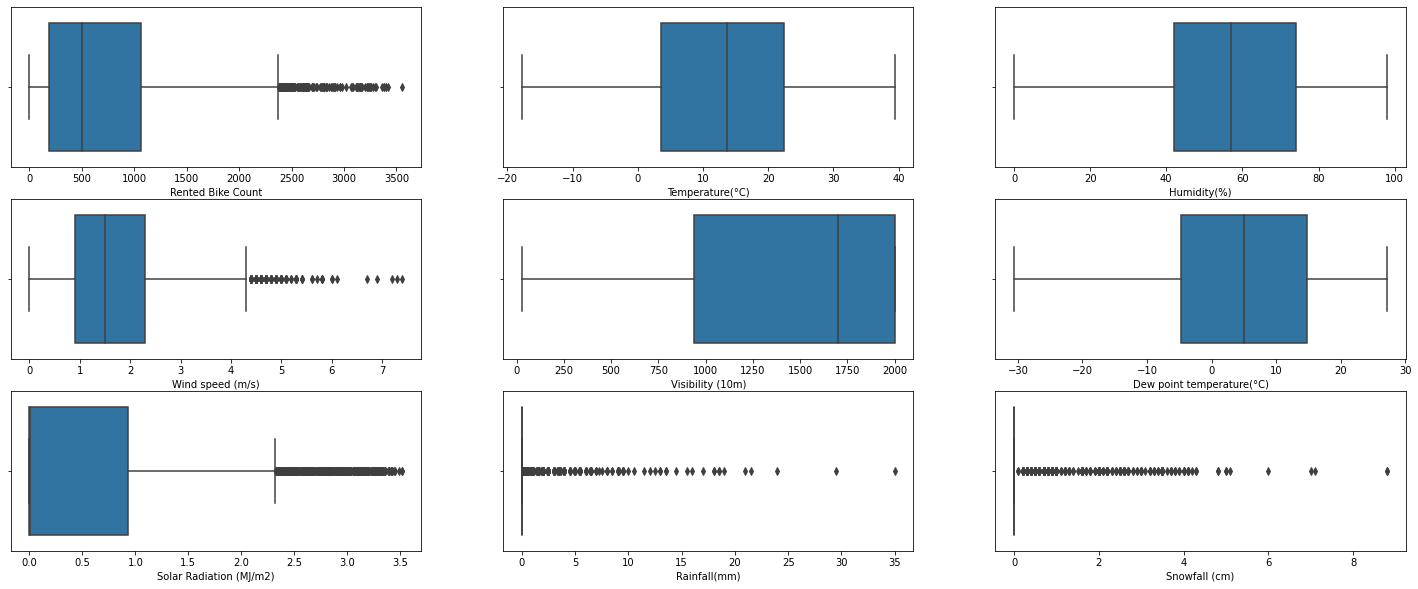

In [13]:
# boxplot in continuous variable
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(25,10)

sns.boxplot(bike_data['Rented Bike Count'], ax=axes[0][0])
sns.boxplot(bike_data['Temperature(°C)'], ax=axes[0][1])
sns.boxplot(bike_data['Humidity(%)'], ax=axes[0][2])
sns.boxplot(bike_data['Wind speed (m/s)'], ax=axes[1][0])
sns.boxplot(bike_data['Visibility (10m)'], ax=axes[1][1])
sns.boxplot(bike_data['Dew point temperature(°C)'], ax=axes[1][2])
sns.boxplot(bike_data['Solar Radiation (MJ/m2)'], ax=axes[2][0])
sns.boxplot(bike_data['Rainfall(mm)'], ax=axes[2][1])
sns.boxplot(bike_data['Snowfall (cm)'], ax=axes[2][2])

In [14]:
#defining the limits to find the outliers
def outlier_limits(df, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
#replacing them with upper and lower limits
def replace_with_limits(df, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_limits(df, variable, q1 = q1, q3 = q3)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit
    
for variable in bike_data[continous_columns].columns:
    replace_with_limits(bike_data, variable)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

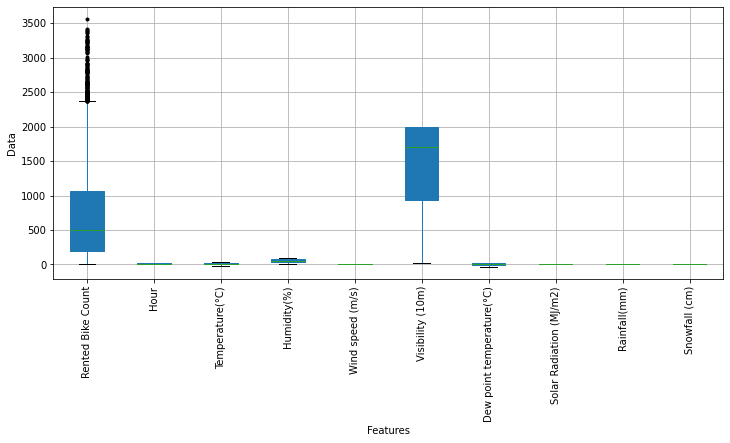

In [15]:
plt.subplots(figsize=(12,5))
bike_data.boxplot(patch_artist=True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

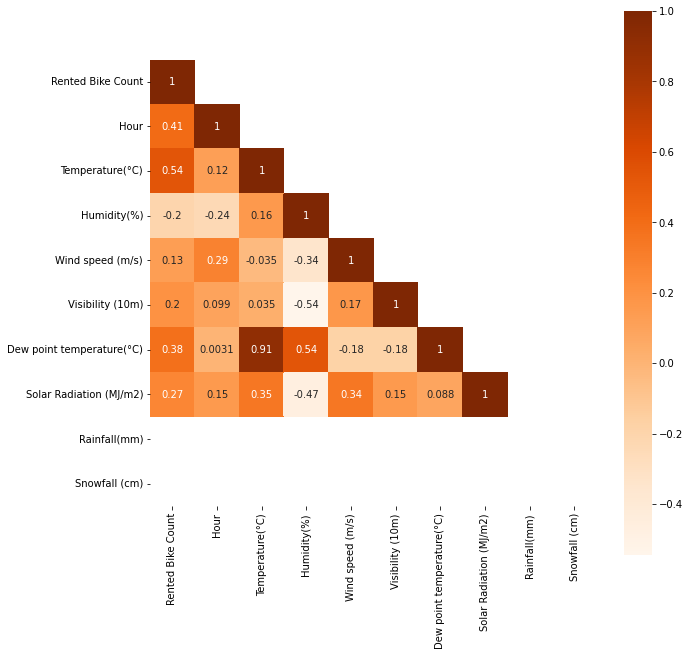

In [16]:
corr = bike_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=corr,
            mask=mask,
            cmap='Oranges',
            square=True,
            annot=True,
            cbar=True)